In [244]:
# import the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("data/train_titanic.csv")

In [245]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,1,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [246]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [247]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [248]:
# Separating the Target Variable

Inputs = Titanic_survivor.drop('Survived',axis =1)

target = Titanic_survivor['Survived']


In [249]:
Inputs.Age = Inputs.Age.fillna(Inputs.Age.mean())

In [252]:
Inputs.Sex = Inputs.Sex.map({'male': 1, 'female': 2})
#Inputs['Sex'].replace([1,2],['male','female'],inplace=True)

In [253]:
Inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [254]:
# Splitting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(Inputs,target,test_size=0.2, random_state = 100)

In [255]:
len(X_train)

712

In [256]:
len(X_test)

179

In [257]:
model = tree.DecisionTreeClassifier()

In [258]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state= 100,
max_depth = 3, min_samples_leaf=2)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=100)

In [259]:
# Function to make predictions

y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [260]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  81.00558659217877


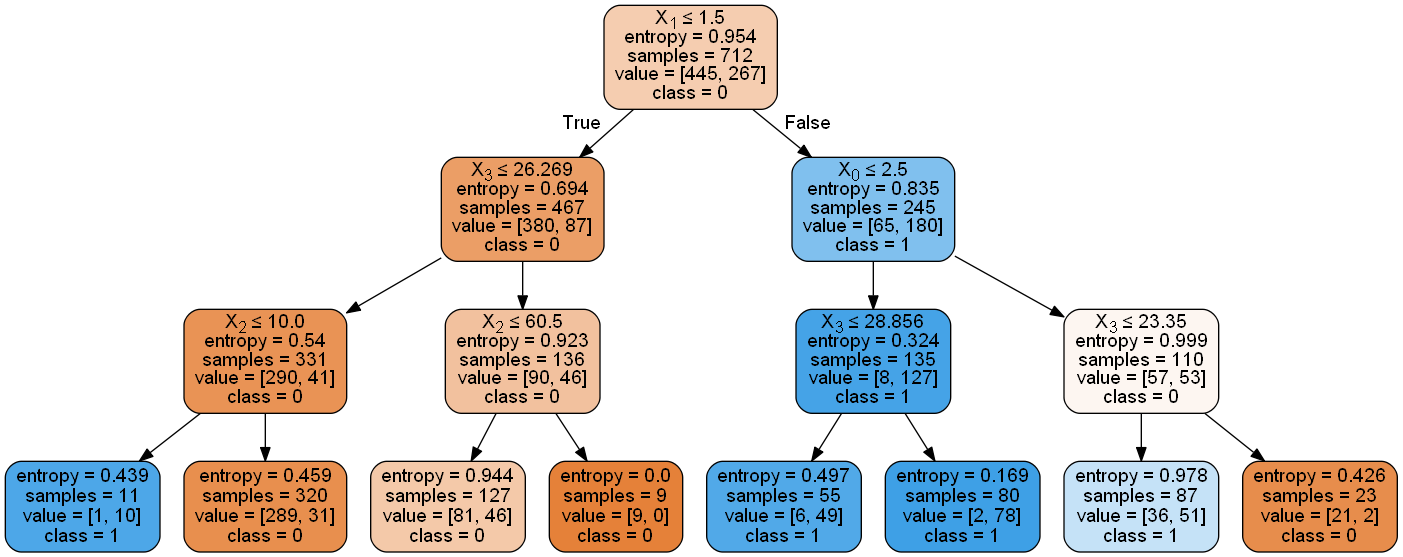

In [261]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
#loading data file
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('TitanicSurvivors.png')
Image(graph.create_png())

In [262]:
Inputs

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [263]:
model1 = tree.DecisionTreeClassifier()

In [264]:
model1.fit(Inputs,target)

DecisionTreeClassifier()

In [265]:
model1.score(Inputs,target)

0.9797979797979798

In [266]:
model1.predict([[3,1,22.000000,7.2500]])

array([0], dtype=int64)

In [267]:
model1.predict([[1,1,26.000000,30.0000]])

array([1], dtype=int64)